In [100]:
from scipy import *
from pylab import *
import numpy as np
from scipy.interpolate import interp1d
from IPython.display import Image

####################################################
### test plots for neutrino batch fiducial model ###
####################################################
kcambhold, Pcambhold = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear-holdCMBconst_matterpow_99.dat').T
kcamb, Pcamb = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_0.dat').T
khalofit, Phalofit = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_matterpow_0.dat').T
khalofit0, Phalofit0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-bird_matterpow_0.dat').T

khalofitT, PhalofitT = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_matterpow_0.dat').T
khalofitT0, PhalofitT0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-halofit_matterpow_0.dat').T

kgadget, Pgadget, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_050').T
kgadget0, Pgadget0, Nmodes0 = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_050').T

Boxsize=256.0
kgadget *= 2*pi/Boxsize
Pgadget *= Boxsize**3
Pgadget0 *= Boxsize**3
binsize=5
k0, k1 = kgadget[0::binsize][:-1], kgadget[binsize-1::binsize]
kgadget_bined =0.5*(k0+k1)

Pgadget_bined = average(Pgadget [:-(len(Pgadget)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

Pgadget0_bined = average(Pgadget0 [:-(len(Pgadget0)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget0)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)



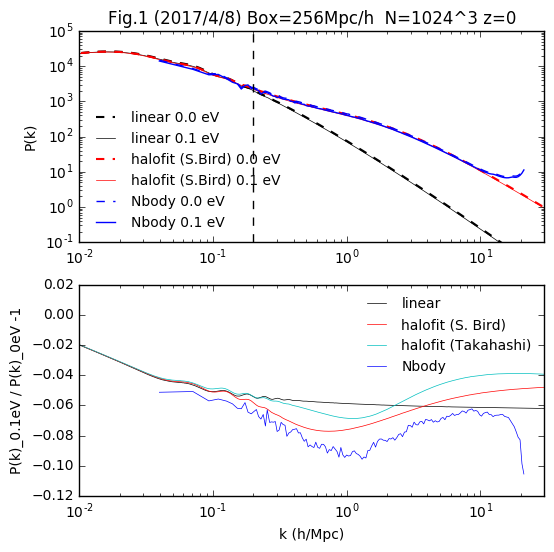

In [88]:
f=figure(figsize=(6,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5,label='linear 0.0 eV')
ax.plot(kcamb, Pcamb, 'k-',lw=0.5,label='linear 0.1 eV')

ax.plot(khalofit0, Phalofit0, 'r--',lw=1.5,label='halofit (S.Bird) 0.0 eV')
ax.plot(khalofit, Phalofit, 'r-',lw=0.5, label='halofit (S.Bird) 0.1 eV')

ax.plot(kgadget_bined, Pgadget0_bined, 'b--', lw=1,label='Nbody 0.0 eV')
ax.plot(kgadget_bined, Pgadget_bined, 'b-', lw=1,label='Nbody 0.1 eV')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
#ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.1 (2017/4/8) Box=256Mpc/h  N=1024^3 z=0')
ax.legend(frameon=0,loc=3,fontsize=10)

ax2.plot(kcamb0[:700],Pcamb[:700]/Pcamb0[:700]-1,'k-',lw=0.5, label='linear')
ax2.plot(khalofit0[:700],Phalofit[:700]/Phalofit0[:700]-1,'r-',lw=0.5, label='halofit (S. Bird)')
ax2.plot(khalofitT0[:700],PhalofitT[:700]/PhalofitT0[:700]-1,'c-',lw=0.5, label='halofit (Takahashi)')
ax2.plot(kgadget_bined,Pgadget_bined/Pgadget0_bined-1,'b-',lw=0.5, label='Nbody')

ax2.legend(frameon=0,fontsize=10)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
#ax2.set_ylim(-0.12,0.03)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_0.1eV / P(k)_0eV -1')
show()

######## note on some test results:
######## the lower power is due to nu mass splitting
######## nor it's due to the definition in omega_m = 1-omega_lambda

Fig.4 in Ali-Haimoud & Bird 2013
(1) I donnot see an excess of power around k=0.1 in Fig.1 above
(2) I donnot see the artefact/spike at k=7
(3) I see a larger suppression of power than other halofit models
(4) FYI, current resolution 1024^3 and 256 Mpc/h, below plot maybe 512^3+256Mpc/h?


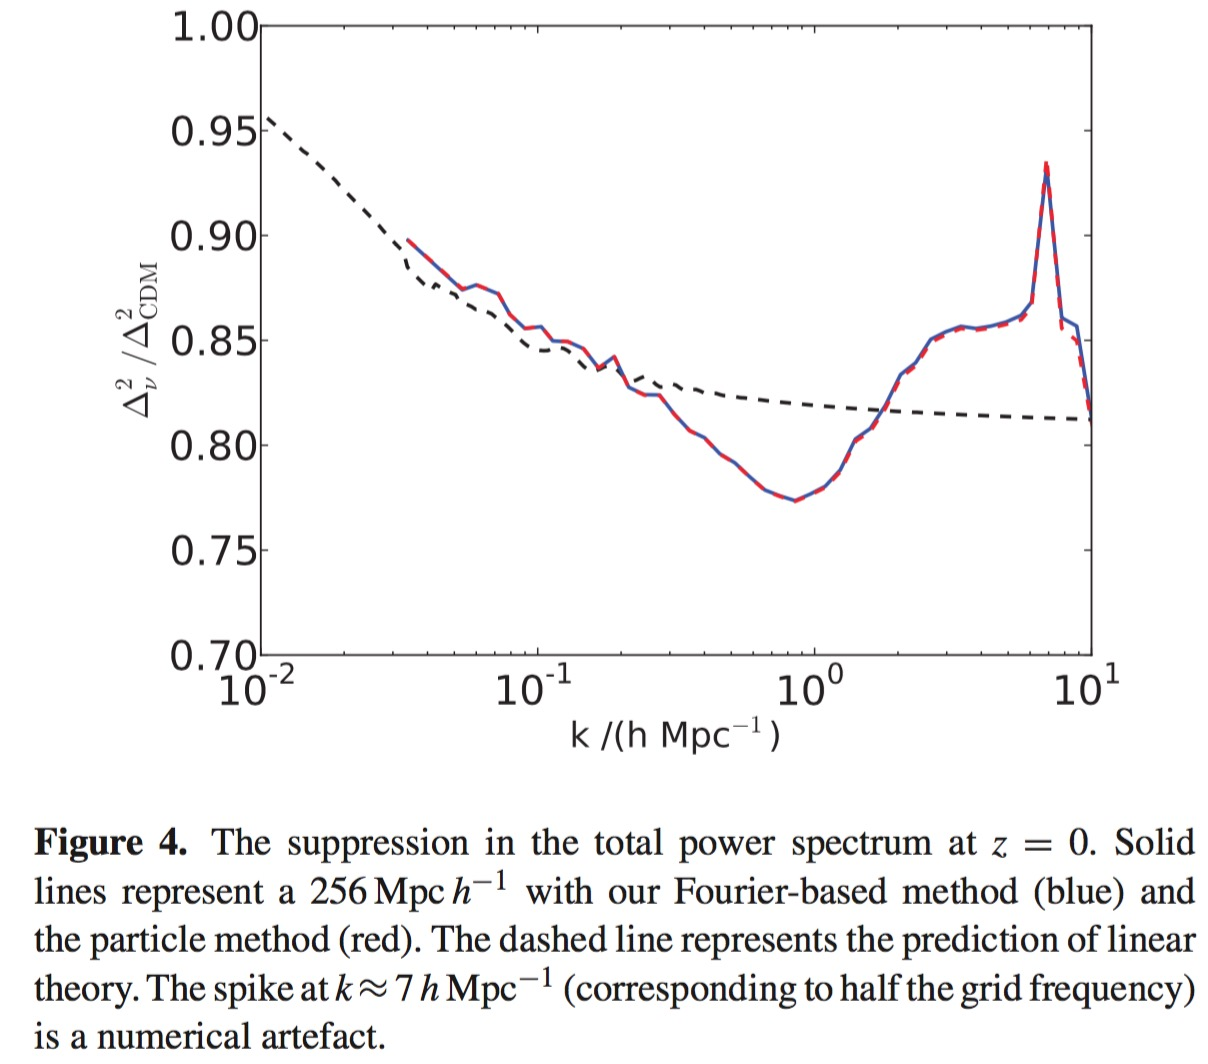

In [87]:
print '''Fig.4 in Ali-Haimoud & Bird 2013
(1) I donnot see an excess of power around k=0.1 in Fig.1 above
(2) I donnot see the artefact/spike at k=7
(3) I see a larger suppression of power than other halofit models
(4) FYI, current resolution 1024^3 and 256 Mpc/h, below plot maybe 512^3+256Mpc/h?'''
Image("plots/AB13fig4.jpg",width=450)

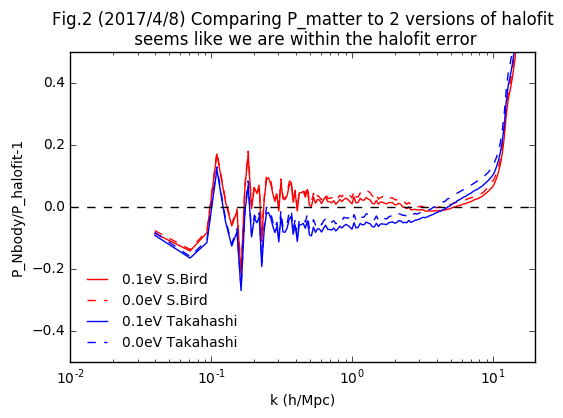

In [86]:
f=figure(figsize=(6,4))
ax=f.add_subplot(111)

Phalofit_out = interp1d(khalofit, Phalofit)(kgadget_bined)
Phalofit0_out = interp1d(khalofit, Phalofit0)(kgadget_bined)

PhalofitT_out = interp1d(khalofitT, PhalofitT)(kgadget_bined)
PhalofitT0_out = interp1d(khalofitT, PhalofitT0)(kgadget_bined)


ax.plot(kgadget_bined, Pgadget_bined/Phalofit_out-1,'r-',label='0.1eV S.Bird')
ax.plot(kgadget_bined, Pgadget0_bined/Phalofit0_out-1,'r--',label='0.0eV S.Bird')

ax.plot(kgadget_bined, Pgadget_bined/PhalofitT_out-1,'b-',label='0.1eV Takahashi')
ax.plot(kgadget_bined, Pgadget0_bined/PhalofitT0_out-1,'b--',label='0.0eV Takahashi')


ax.legend(fontsize=10,frameon=0,loc=3)
ax.plot([1e-2, 20],[0,0],'k--')
ax.set_xlabel('k (h/Mpc)')
ax.set_xscale('log')
ax.set_ylabel('P_Nbody/P_halofit-1')
ax.set_xlim(1e-2,20)
ax.set_ylim(-0.5,0.5)
ax.set_title("Fig.2 (2017/4/8) Comparing P_matter to 2 versions of halofit\n seems like we are within the halofit error")
show()

In [104]:
############ check IC and higher redshift snapshots ##########
#kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_99.dat').T
kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb0_z3, Pcamb0_z3 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_3.dat').T

#kcamb_z99, Pcamb_z99 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_99.dat').T
kcamb_z99, Pcamb_z99 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb_z3, Pcamb_z3 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T

kgadget_z99, Pgadget_z99, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-ICs').T
kgadget_z3, Pgadget_z3, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_000').T

kgadget0_z99, Pgadget0_z99, Nmodes = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-ICs').T
kgadget0_z3, Pgadget0_z3, Nmodes = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_000').T

#Boxsize=256.0
kgadget_z3 *= 2*pi/Boxsize
Pgadget0_z3 *= Boxsize**3
Pgadget0_z99 *= Boxsize**3
Pgadget_z3 *= Boxsize**3
Pgadget_z99 *= Boxsize**3

#binsize=5
#k0, k1 = kgadget[0::binsize][:-1], kgadget[binsize-1::binsize]
#kgadget_bined =0.5*(k0+k1)

Pgadget_z3_bined = average(Pgadget_z3 [:-(len(Pgadget_z3)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget_z3)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

Pgadget0_z3_bined = average(Pgadget0_z3 [:-(len(Pgadget0_z3)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget0_z3)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)


Pgadget_z99_bined = average(Pgadget_z99 [:-(len(Pgadget_z99)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget_z99)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

Pgadget0_z99_bined = average(Pgadget0_z99 [:-(len(Pgadget0_z99)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget0_z99)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

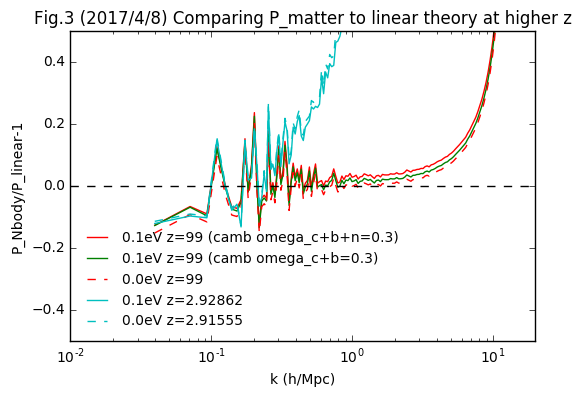

In [113]:
f=figure(figsize=(6,4))
ax=f.add_subplot(111)

P0_z99_out = interp1d(kcamb0_z99, Pcamb0_z99)(kgadget_bined)
P0_z3_out = interp1d(kcamb0_z3, Pcamb0_z3)(kgadget_bined)

P_z99_out = interp1d(kcamb_z99, Pcamb_z99)(kgadget_bined)
P_z99hold_out = interp1d(kcambhold, Pcambhold)(kgadget_bined)
P_z3_out = interp1d(kcamb_z3, Pcamb_z3)(kgadget_bined)


ax.plot(kgadget_bined, Pgadget_z99_bined/P_z99_out-1,'r-',label='0.1eV z=99 (camb omega_c+b+n=0.3)')
ax.plot(kgadget_bined, Pgadget_z99_bined/P_z99hold_out-1,'g-',label='0.1eV z=99 (camb omega_c+b=0.3)')
ax.plot(kgadget_bined, Pgadget0_z99_bined/P0_z99_out-1,'r--',label='0.0eV z=99 ')

ax.plot(kgadget_bined, Pgadget_z3_bined/P_z3_out-1,'c-',label='0.1eV z=2.92862')
ax.plot(kgadget_bined, Pgadget0_z3_bined/P0_z3_out-1,'c--',label='0.0eV z=2.91555')

#ax.plot((0.2,0.2), (-0.5,0.5),'k--')
ax.legend(fontsize=10,frameon=0,loc=3)
ax.plot([1e-2, 20],[0,0],'k--')
ax.set_xlabel('k (h/Mpc)')
ax.set_xscale('log')
ax.set_ylabel('P_Nbody/P_linear-1')
ax.set_xlim(1e-2,20)
ax.set_ylim(-0.5,0.5)
ax.set_title("Fig.3 (2017/4/8) Comparing P_matter to linear theory at higher z")
show()